# **Esercitazione 3 - Classificatori: Regressione Logistica e SVM**

In questa esercitazione applicheremo quanto appreso sui classificatori. Nello specifico utilizzeremo:

* **Regressione Logistica:** Un modello lineare che utilizza la funzione sigmoide per predire le probabilità delle classi.

* **Support Vector Machines (SVM):** Efficace sia per problemi lineari che non lineari utilizzando il kernel trick.

### **Dataset MNIST-784**

Il dataset di riferimento sarà `MNIST-784`, già visto in precedenza. Il dataset contiene immagini di 10 classi (da 0 a 9). Per comodità utilizzeremo soltanto 2 classi inizialmente, per rendere la classificazione binaria. Nello specifico utilizzeremo soltanto le immagini che hanno come etichetta `3` e `8`. 

Il codice seguente esegui l' import delle librerie necessarie e la selezione delle etichette che ci interessano. Le etichette vengono anche rimpiazzate con `1` e `0`, emulando il caso di classificazione binaria.

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [226]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target.astype(int)

indexes = (y == 3) | (y == 8)
X = X[indexes]  
y = y[indexes]

y = np.where(y == 8, 1, 0)

print(f"Features shape: {X.shape}, Labels shape: {y.shape}")

Features shape: (13966, 784), Labels shape: (13966,)


### **Divisione e standardizzazione del dataset** 

Dividiamo il dataset in `train set`, `validation set` e `test set` utilizzando le proporzioni già impostate. Successivamente applichiamo la standardizzazione utilizzando `StandardScaler`.

In [227]:
# Usare le seguenti proporzioni per il train, validation e test
train_porzione = 0.6  
val_porzione = 0.2  
test_porzione = 0.2

# Calcola le lunghezze
n_totale = X.shape[0]
train_num = int(train_porzione * n_totale)
val_num = int(val_porzione * n_totale)

# Suddivisione
trainX = X[:train_num]
trainY = y[:train_num]

validationX = X[train_num:train_num + val_num]
validationY = y[train_num:train_num + val_num]

testX = X[train_num + val_num:]
testY = y[train_num + val_num:]

scaler = StandardScaler()
trainX_STD = scaler.fit_transform(trainX)
validationX_STD = scaler.transform(validationX)
testX_STD = scaler.transform(testX)

# Controllo 
print("Train:", trainX_STD.shape)
print("Validation:", validationX_STD.shape)
print("Test:", testX_STD.shape)

Train: (8379, 784)
Validation: (2793, 784)
Test: (2794, 784)


## **Esercizio 1: Implementare la Regressione Logistica**

Per implementare la regressione logistica utilizzeremo la classe `sklearn.linear_model.LogisticRegression` presente in `scikit-learn`. La documentazione è disponibile [a questo link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Per utilizzarla al meglio, di seguito vediamo i parametri chiave che bisogna specificare al momento della creazione dell' istanza:

* **`C`**: Inverso della forza di regolarizzazione L2 (λ). Valori più piccoli indicano una regolarizzazione più forte.
* **`solver`**: Algoritmo da utilizzare nel problema di ottimizzazione (nel nostro caso, `liblinear`).
* **`max_iter`**: Imposta il numero massimo di iterazioni affinché l'algoritmo di ottimizzazione converga e trovi i migliori parametri del modello.

### Esempio di sintassi per istanziare, addestrare e predire

```python
#Importo LogisticRegression da scikit-learn
from sklearn.linear_model import LogisticRegression

#1. Instanzio il modello di Regressione Logistica
# Durante la creazione dell' istanza imposto i parametri che desidero
model = LogisticRegression(max_iter=100, solver='liblinear',C=1.0)

#2. Train del modello utilizzando il metodo .fit()
model.fit(X_train, y_train)

#3. Calcolo delle predizioni utilizzando il metodo .predict()
predictions = model.predict(X_test)

```

### **Guida per la risoluzione**

Di seguito sono spiegati i passaggi principali per la risoluzione dell' esercizio.

1. **Creazione del modello:** Creare un' istanza della classe `LogisticRegression`, specificando i parametri presentati poco sopra. In particolare vogliamo i seguenti parametri:
    
    - `max_iter` = 100
    - `solver` = `'liblinear'`
    - `C` = 1.0

2. **Addestramento del modello:** Addestriamo il modello utilizzando il metodo `.fit()`. Il modello deve essere addestrato sui dati di train standardizzati. 

3. **Calcolo delle predizioni:** Calcoliamo le predizioni sul validation e test utilizzando il metodo `.predict()` del modello. 

4. **Valutazione delle prestazioni del modello:** Calcoliamo l' accuracy del modello. Ricordiamo che l' accuracy è data dal numero di predizioni corrette che il modello effettua rispetto al totale dei campioni. Dobbiamo valutare il modello sia sul validation set che sul test set. Infine stampare il valore di accuracy sul validation e sul test.

In [228]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1 - Creazione del modello
modello = LogisticRegression(max_iter=100, solver='liblinear',C=1.0)
# svolgimento...

In [229]:
# Step 2 - Addestramento del modello
modello.fit(trainX_STD, trainY)
# svolgimento...

LogisticRegression(solver='liblinear')

In [230]:
# Step 3 - Calcolo delle predizioni
predictionsValidation = modello.predict(validationX_STD)
predictionsTest = modello.predict(testX_STD)

print("Predictions Validation:", predictionsValidation.shape)
print("Predictions Test:", predictionsTest.shape)
# svolgimento...

Predictions Validation: (2793,)
Predictions Test: (2794,)


In [231]:
# Step 4 - Calcolo delle metriche di valutazione
correctValidation = np.sum(validationY == predictionsValidation)
totalValidation = len(validationY)
accuracyValidation = correctValidation / totalValidation if totalValidation > 0 else 0

correctTest = np.sum(testY == predictionsTest)
totalTest = len(testY)
accuracyTest = correctTest / totalTest if totalTest > 0 else 0

print(f"Validation accuracy: {accuracyValidation:.4f}")
print(f"Test accuracy: {accuracyTest:.4f}")


# svolgimento...

Validation accuracy: 0.9520
Test accuracy: 0.9613


## **Esercizio 2: Implementare Support Vector Machines (SVM)**

Per implementare le SVM utilizziamo la classe `sklearn.svm.SVC` presente in `scikit-learn`. La documentazione è disponibile [a questo link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Per utilizzarla al meglio, di seguito vediamo i parametri chiave che bisogna specificare al momento della creazione dell' istanza:

* **`C`**: Parametro di regolarizzazione. L'intensità della regolarizzazione è inversamente proporzionale a C.
* **`kernel`**: Specifica il tipo di kernel da utilizzare nell'algoritmo (`'linear'`, `'poly'`, `'rbf'`).

### Esempio di sintassi per istanziare, addestrare e predire

```python
#Importare la classe SVC da scikit-learn
from sklearn.svm import SVC

#1. Creare un' istanza della classe SVC
# Durante la creazione dell' istanza imposto i parametri che desidero
model = SVC(kernel='linear', C=1.0)

#2. Train del modello utilizzando il metodo .fit()
model.fit(X_train, y_train)

#3. Calcolo delle predizioni utilizzando il metodo .predict()
predictions = model.predict(X_test)

### **C** in SVM:

**C** è una penalità per i punti classificati erroneamente.

- **Small C**: Margine più ampio, tollera alcuni errori (rischio di underfitting).
- **Large C**: Minimizza gli errori, margine più stretto (rischio di overfitting).

### **Guida per la risoluzione**

Di seguito sono spiegati i passaggi principali per la risoluzione dell' esercizio.

1. **Creazione del modello:** Creare un' istanza della classe `SVC`, specificando i parametri presentati poco sopra. In particolare vogliamo i seguenti parametri:
    
    - `kernel` = `'linear'`
    - `C` = 0.01

2. **Addestramento del modello:** Addestriamo il modello utilizzando il metodo `.fit()`. Il modello deve essere addestrato sui dati di train standardizzati. 

3. **Calcolo delle predizioni:** Calcoliamo le predizioni sul validation e test utilizzando il metodo `.predict()` del modello. 

4. **Valutazione delle prestazioni del modello:** Calcoliamo l' accuracy del modello. Ricordiamo che l' accuracy è data dal numero di predizioni corrette che il modello effettua rispetto al totale dei campioni. Dobbiamo valutare il modello sia sul validation set che sul test set. Infine stampare il valore di accuracy sul validation e sul test.

In [233]:
# Step 1 - Creazione del modello
from sklearn.svm import SVC
import numpy as np

# svolgimento...
modello = SVC(kernel='linear', C=0.01)


In [234]:
# Step 2 - Addestramento del modello

modello.fit(trainX_STD, trainY)
# svolgimento...

SVC(C=0.01, kernel='linear')

In [235]:
# Step 3 - Calcolo delle predizioni
predictionsValidation = modello.predict(validationX_STD)
predictionsTest = modello.predict(testX_STD)

print("Predictions Validation:", predictionsValidation.shape)
print("Predictions Test:", predictionsTest.shape)
# svolgimento...

Predictions Validation: (2793,)
Predictions Test: (2794,)


In [236]:
# Step 4 - Calcolo delle metriche di valutazione

# svolgimento...

correctValidation = np.sum(validationY == predictionsValidation)
totalValidation = len(validationY)
accuracyValidation = correctValidation / totalValidation if totalValidation > 0 else 0

correctTest = np.sum(testY == predictionsTest)
totalTest = len(testY)
accuracyTest = correctTest / totalTest if totalTest > 0 else 0

print(f"Validation accuracy: {accuracyValidation:.4f}")
print(f"Test accuracy: {accuracyTest:.4f}")

Validation accuracy: 0.9646
Test accuracy: 0.9710


### **Esercizio 2.1: Implementare SVM con kernel trick**

Vogliamo implementare un classificatore SVM che utilizza il kernel-trick. Le linee guida sono esattamente quanto fatto prima, dobbiamo però modificare il tipo di kernel del modello. Per utilizzare il kernel trick usiamo un **kernel a base radiale (Radial Basis Function)** specificando il parametro:

- `kernel` = `'rbf'`

In [237]:
# Step 1 - Creazione del modello
from sklearn.svm import SVC
import numpy as np

modello= SVC(kernel='rbf', C=0.01)

# Step 2 - Addestramento del modello
modello.fit(trainX_STD, trainY)

# Step 3 - Calcolo delle predizioni
predictionsValidation = modello.predict(validationX_STD)
predictionsTest = modello.predict(testX_STD)

print("Predictions Validation:", predictionsValidation.shape)
print("Predictions Test:", predictionsTest.shape)

# Step 4 - Calcolo delle metriche di valutazione
correctValidation = np.sum(validationY == predictionsValidation)
totalValidation = len(validationY)
accuracyValidation = correctValidation / totalValidation if totalValidation > 0 else 0

correctTest = np.sum(testY == predictionsTest)
totalTest = len(testY)
accuracyTest = correctTest / totalTest if totalTest > 0 else 0

print(f"Validation accuracy: {accuracyValidation:.4f}")
print(f"Test accuracy: {accuracyTest:.4f}")

Predictions Validation: (2793,)
Predictions Test: (2794,)
Validation accuracy: 0.9162
Test accuracy: 0.9291


## **Esercizio 3: Metriche di valutazione**

**Matrice di confusione:** 

La matrice di confusione (anche nota come `confusion matrix` ) è una tabella che riassume le prestazioni di un modello di classificazione mostrando i conteggi dei veri positivi (TP), veri negativi (TN), falsi positivi (FP) e falsi negativi (FN). In questo codice, per un problema di classificazione binaria con classi 0 e 1, la `confusion matrix` è strutturata come segue:

|                | **Predicted Class 0** | **Predicted Class 1** |
|----------------|:------------------------:|:------------------------:|
| **Actual Class 0** | TN                     | FP                     |
| **Actual Class 1** | FN                     | TP                     |

* **TN (True Negatives):** Il numero di istanze che erano effettivamente Classe 0 e sono state correttamente previste come Classe 0.

* **FP (False Positives):** Il numero di istanze che erano effettivamente Classe 0 ma sono state erroneamente previste come Classe 1.

* **FN (False Negatives):** Il numero di istanze che erano effettivamente Classe 1 ma sono state erroneamente previste come Classe 0.

* **TP (True Positives):** Il numero di istanze che erano effettivamente Classe 1 e sono state correttamente previste come Classe 1.


* **Accuracy:** Misura la correttezza complessiva del modello. È il rapporto tra le istanze correttamente classificate e il numero totale di istanze.

    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$

* **Precision:** Misura l'accuratezza delle previsioni positive. È il rapporto tra le istanze positive correttamente previste e il numero totale di istanze previste come positive.

    $$\text{Precision} = \frac{TP}{TP + FP}$$

* **Recall (Sensitivity or True Positive Rate):** Misura la capacità del modello di trovare tutte le istanze positive. È il rapporto tra le istanze positive correttamente previste e il numero totale di vere istanze positive.

    $$\text{Recall} = \frac{TP}{TP + FN}$$

* **F1-Score:** La media armonica di precisione e richiamo. Fornisce un punteggio unico che bilancia sia la precisione che il richiamo, particolarmente utile quando c'è una distribuzione asimmetrica delle classi.

    $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Per calcolare le metriche utilizziamo le funzioni presenti in `sklearn.metrics`:

#### `confusion_matrix`

Dati in input il target reale e le predizioni calcola la matrice di confusione. Documentazione disponibile al seguente link [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

**Syntax**:
```python
confusion_matrix(y_true, y_pred)
```

#### `classification_report`

Genera un report testuale che mostra le principali metriche di classificazione. Documentazione disponibile al seguente link [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

**Syntax**:
```python
classification_report(y_true, y_pred)
```

#### `precision_score`

Misura il rapporto tra le istanze positive correttamente previste e il totale delle previsioni positive. Documentazione disponibile al seguente link [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

**Syntax**:
```python
precision_score(y_true, y_pred, average='binary')
```

#### `recall_score`

Misura il rapporto tra le istanze positive correttamente previste e il totale delle istanze positive effettive. Documentazione disponibile al seguente link [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

**Syntax**:
```python
recall_score(y_true, y_pred, average='binary')
```

#### `f1_score`

Calcola la media armonica di precision e recall. Documentazione disponibile al seguente link [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

**Syntax**:
```python
f1_score(y_true, y_pred, average='binary')
```



### **Guida:**

1. **Calcoliamo la matrice di confusione:** Calcolare la matrice di confusione con `confusion_matrix` e stamparla.

2. **Calcoliamo precision, recall e F1 score:** Calcolare le metriche di valutazione con le funzioni presentate sopra e stamparle.

3. **Calcoliamo il classification report:** Calcolare il classification report e stamparlo.

4. **Stampare la matrice di confusione:** Utilizzare la funzione `plot_confusion_matrix` che vi abbiamo fornito per stampare la matrice di confusione. La funzione ha bisogno di un unico parametro che è la matrice di confusione calcolata al punto 1.

In [238]:
# Step 1 - Calcolare la matrice di confusione

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrixValidation = confusion_matrix (validationY, predictionsValidation) 
matrixTest = confusion_matrix (testY, predictionsTest)

print("Matrix Validation:", matrixValidation)
print("Matrix Test:", matrixTest)

# svolgimento...

Matrix Validation: [[1354   58]
 [ 176 1205]]
Matrix Test: [[1380   42]
 [ 156 1216]]


In [239]:
# Step 2 - Calcolare precision, recall e F1 score

from sklearn.metrics import precision_score, recall_score, f1_score

precision_scoreValidation = precision_score(validationY, predictionsValidation, average='binary')
precision_scoreTest = precision_score(testY, predictionsTest, average='binary')

recall_scoreValidation = recall_score(validationY, predictionsValidation, average='binary')
recall_scoreTest = recall_score(testY, predictionsTest, average='binary')

f1_scoreValidation = f1_score(validationY, predictionsValidation, average='binary')
f1_scoreTest = f1_score(testY, predictionsTest, average='binary')

print("precision_score Validation:", precision_scoreValidation)
print("precision_score Test:", precision_scoreTest)
print("recall_score Validation:", recall_scoreValidation)
print("recall_score Test:", recall_scoreTest)
print("f1_score Validation:", f1_scoreValidation)
print("f1_score Test:", f1_scoreTest)

# svolgimento...

precision_score Validation: 0.9540775930324624
precision_score Test: 0.9666136724960255
recall_score Validation: 0.8725561187545257
recall_score Test: 0.8862973760932945
f1_score Validation: 0.9114977307110438
f1_score Test: 0.9247148288973386


In [240]:
# Step 3 - Calcolare il report di classificazione
from sklearn.metrics import classification_report

classification_reportValidation = classification_report(validationY, predictionsValidation)
classification_reportTest = classification_report(testY, predictionsTest)

print(classification_reportValidation)
print(classification_reportTest)

# svolgimento...

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1412
           1       0.95      0.87      0.91      1381

    accuracy                           0.92      2793
   macro avg       0.92      0.92      0.92      2793
weighted avg       0.92      0.92      0.92      2793

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1422
           1       0.97      0.89      0.92      1372

    accuracy                           0.93      2794
   macro avg       0.93      0.93      0.93      2794
weighted avg       0.93      0.93      0.93      2794



Matrice di Confusione - Validation Set


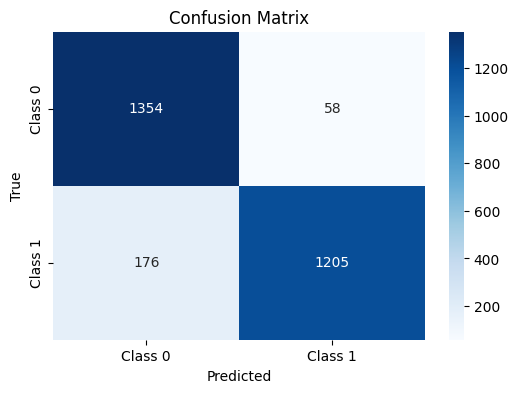

Matrice di Confusione - Test Set


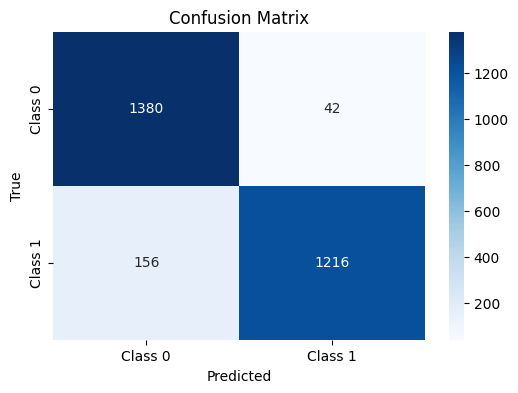

In [241]:
# Step 4 - Visualizzare la matrice di confusione

def plot_confusion_matrix(cm):
    """
    Visualizza una matrice di confusione come heatmap.
    
    Parameters:
    -----------
    cm : numpy.ndarray
        La matrice di confusione da visualizzare
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

print("Matrice di Confusione - Validation Set")
plot_confusion_matrix(matrixValidation)

print("Matrice di Confusione - Test Set")
plot_confusion_matrix(matrixTest)
    
# svolgimento...

### **ROC Curve, AUC**

Per calcolare la ROC curve, e conseguentemente l' AUC, abbiamo bisogno delle probabilità di predizione. 

Nel caso della **regressione logistica** possiamo utilizzare l' attributo del modello `predict_proba` da utilizzare come segue:

```python
# Estrai le probabilità della classe positiva
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
```

Per quanto riguarda invece l' **SVM**, è necessario specificare il parametro `probability` = **True** affinchè `predict_proba` funzioni.

```python
# Specifica il parametro probability=True 
classifier = SVC(kernel='linear', C=0.01, probability=True)
```

Una volta estratte le probabilità possiamo utilizzare le funzione di `sklearn.metrics`:

- `roc_curve` 
- `roc_auc_score`

Di seguito è mostrata la sintassi per utilizzare le due funzioni.

---

#### `roc_curve`
```python
# Calcola i valori della curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
```
Calcola i valori della Curva ROC (Receiver Operating Characteristic): Tasso di Falsi Positivi (FPR), Tasso di Veri Positivi (TPR) e soglie.

---

#### `roc_auc_score`
```python
# Calcola AUC
auc = roc_auc_score(y_test, y_pred_proba)
```
Calcola l'Area Under the Curve (AUC) per la ROC, quantificando la capacità del modello di distinguere tra classi positive e negative.

In [243]:
# Step 1 - Allenare l' SVM con il parametro probability=True ed estrarre le probabilità

modello = SVC(kernel='linear', C=0.01, probability=True)
modello.fit(trainX_STD, trainY)

SVC(C=0.01, kernel='linear', probability=True)

In [246]:
# Step 2 - Estrarre le probabilità dal modello di regressione logistica
# ATTENZIONE: Per il calcolo della ROC curve ci servono le probabilità della classe positiva.

# Estrai le probabilità della classe positiva
y_pred_proba = modello.predict_proba(testX_STD)[:, 1]

In [247]:
# Step 3 - Calcolare le curve ROC e AUC per entrambe le probabilità (logistic e SVM)
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(testY, y_pred_proba)
auc = roc_auc_score(testY, y_pred_proba)
print(fpr, auc)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.03234880e-04
 7.03234880e-04 1.40646976e-03 1.40646976e-03 2.10970464e-03
 2.10970464e-03 2.81293952e-03 2.81293952e-03 3.51617440e-03
 3.51617440e-03 4.21940928e-03 4.21940928e-03 4.92264416e-03
 4.92264416e-03 6.32911392e-03 6.32911392e-03 7.03234880e-03
 7.03234880e-03 7.73558368e-03 7.73558368e-03 8.43881857e-03
 8.43881857e-03 9.84528833e-03 9.84528833e-03 1.05485232e-02
 1.05485232e-02 1.12517581e-02 1.12517581e-02 1.19549930e-02
 1.19549930e-02 1.26582278e-02 1.26582278e-02 1.33614627e-02
 1.33614627e-02 1.40646976e-02 1.40646976e-02 1.47679325e-02
 1.47679325e-02 1.54711674e-02 1.54711674e-02 1.61744023e-02
 1.61744023e-02 1.68776371e-02 1.68776371e-02 1.75808720e-02
 1.75808720e-02 1.82841069e-02 1.82841069e-02 1.89873418e-02
 1.89873418e-02 1.96905767e-02 1.96905767e-02 2.03938115e-02
 2.03938115e-02 2.10970464e-02 2.10970464e-02 2.18002813e-02
 2.18002813e-02 2.25035162e-02 2.25035162e-02 2.32067511e-02
 2.32067511e-02 2.390998

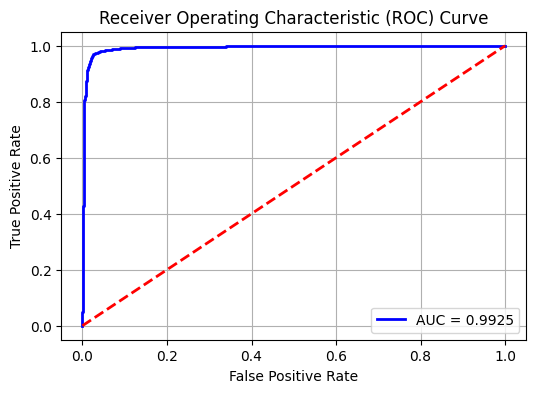

AUC: 0.9925


In [248]:
# Step 4 - Disegnare le curve ROC per entrambe le probabilità (logistic e SVM)

def plot_roc_curve(fpr, tpr, auc):
    """
    Disegna la curva ROC e stampa il valore AUC.

    Parameters:
    -----------
    fpr : array-like
        Tasso di falsi positivi (False Positive Rate).
    tpr : array-like
        Tasso di veri positivi (True Positive Rate).
    auc : float
        Area sotto la curva (AUC).
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Linea di non discriminazione
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Stampa il valore AUC
    print(f"AUC: {auc:.4f}")
plot_roc_curve(fpr, tpr, auc)
# svolgimento...

# **Esercizio 4: Classificazione multi classe**

Se finora abbiamo lavorato soltanto con classificazione binaria, adesso addestriamo nuovamente i classificatori visti sopra, ma nella situazione in cui abbiamo più classi. 

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = np.array(mnist.data), np.array(mnist.target.astype(int))

# Utilizziamo soltanto il 20% dei campioni del dataset per questioni di praticità
n_percent = 0.2  

# La funzione train_test_split ci assicura che i dati che rimuoviamo siano bilanciati.
# In questo modo non alteriamo la distribuzione delle classi.
X, _, y, _ = train_test_split(
    X, y, train_size=n_percent, stratify=y, random_state=42
)

X, y = shuffle(X, y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14000, 784)
Shape of y: (14000,)


In [250]:
# Step 1 - Dividiamo il dataset in train, validation e test e standardizziamo.
train_fraction = 0.6  
validation_fraction = 0.2  
test_fraction = 0.2  

# Calcola le lunghezze
n_totale = X.shape[0]
train_num = int(train_porzione * n_totale)
val_num = int(val_porzione * n_totale)

# Suddivisione
trainX = X[:train_num]
trainY = y[:train_num]

validationX = X[train_num:train_num + val_num]
validationY = y[train_num:train_num + val_num]

testX = X[train_num + val_num:]
testY = y[train_num + val_num:]

scaler = StandardScaler()
trainX_STD = scaler.fit_transform(trainX)
validationX_STD = scaler.transform(validationX)
testX_STD = scaler.transform(testX)

print("Train:", trainX_STD.shape)
print("Validation:", validationX_STD.shape)
print("Test:", testX_STD.shape)

# svolgimento...

Train: (8400, 784)
Validation: (2800, 784)
Test: (2800, 784)


In [251]:
# Step 2 - Alleniamo il modello di regressione logistica e calcoliamo le predizioni e prestazioni.
from sklearn.linear_model import LogisticRegression
import numpy as np

modello = LogisticRegression(max_iter = 200, solver = 'lbfgs')
modello.fit(trainX_STD, trainY)

predictionsValidation = modello.predict(validationX_STD)
predictionsTest = modello.predict(testX_STD)

print(predictionsValidation.shape)
print(predictionsTest.shape)

# IMPORTANTE:
# Quando istanziamo la classe LogisticRegression utilizziamo come parametri
# max_iter=200 e solver='lbfgs'.

# svolgimento...

(2800,)
(2800,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [252]:
# Step 3 - Alleniamo il modello di SVM e calcoliamo le predizioni e prestazioni.
from sklearn.svm import SVC

modello = SVC(C = 0.01, kernel = 'linear', decision_function_shape = 'ovr')

# Step 2 - Addestramento del modello
modello.fit(trainX_STD, trainY)

# Step 3 - Calcolo delle predizioni
predictionsValidation = modello.predict(validationX_STD)
predictionsTest = modello.predict(testX_STD)

print("Predictions Validation:", predictionsValidation.shape)
print("Predictions Test:", predictionsTest.shape)
# IMPORTANTE:
# Quando istanziamo la classe SVC utilizziamo come parametri C=0.01, 
# kernel='linear' e decision_function_shape='ovr'.

# svolgimento...

Predictions Validation: (2800,)
Predictions Test: (2800,)


# **Esercizio 5: Scrivere una funzione pipeline per l' allenamento di un classificatore**

La funzione `pipeline` prende in input il train set, `X_train` e `y_train`, il validation set, `X_val` e `y_val`, e un dizionario `hyperparams` che contiene una configurazione di training.

La funzione deve:

* Applicare la PCA **se richiesto**.

* Standardizzare i dati **a prescindere che sia richiesto o meno**.

* Allenare un classificatore. Il dizionario avrà una chiave `classifier`, il cui value può essere:

    * `lr` per indicare un modello di **Regressione Logistica**.
    * `svm` per indicare un modello **SVM**. 

* Effettuare le predizioni e utilizzarle per calcolare l' accuracy del classificatore.

In [266]:
# IMPORTANTE: Eseguire questa cella prima di procedere

def plot_confusion_matrix_multiclass(cm):
    """
    Visualizza una matrice di confusione come heatmap.

    Parameters:
    -----------
    cm : numpy.ndarray
        La matrice di confusione da visualizzare
    """
    # Calcola dinamicamente le etichette delle classi
    class_labels = [f"Class {i}" for i in range(cm.shape[0])]
    
    # Visualizza la heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [267]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def pipeline(trainX, trainY, validationX, validationY, hyperparams):
    # Standardizzazione
    scaler = StandardScaler()
    trainX_STD = scaler.fit_transform(trainX)
    validationX_STD = scaler.transform(validationX)
    
    # PCA se richiesta
    if hyperparams['use_pca']:
        pca = PCA(n_components=0.95)
        trainX_STD = pca.fit_transform(trainX_STD)
        validationX_STD = pca.transform(validationX_STD)

    # Selezione del classificatore
    if hyperparams['classifier'] == 'lr':
        modello = LogisticRegression(max_iter=200, solver='lbfgs')
        
    elif hyperparams['classifier'] == 'svm':
        modello = SVC(C=0.01, kernel='linear', decision_function_shape='ovr')

    # Addestramento
    modello.fit(trainX_STD, trainY)
    
    # Predizione
    predictionsValidation = modello.predict(validationX_STD)
    
    # Accuracy
    accuracyValidation = np.mean(validationY == predictionsValidation)
    
    # Matrice di confusione
    cm = confusion_matrix(validationY, predictionsValidation)
    plot_confusion_matrix_multiclass(cm)

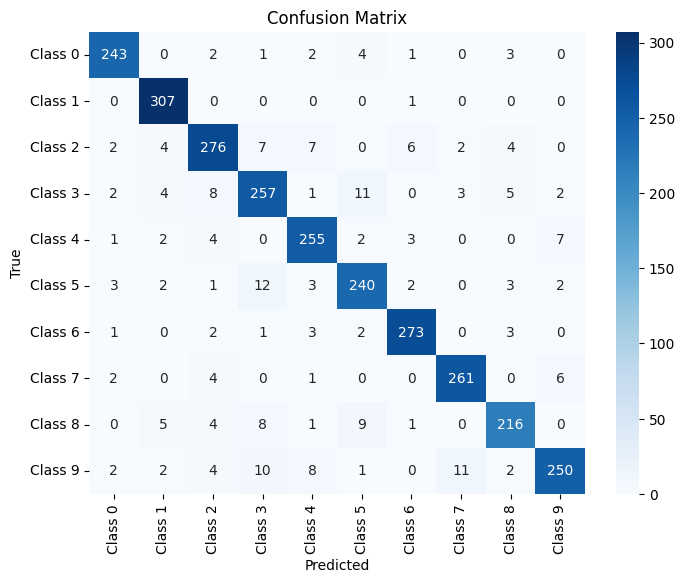

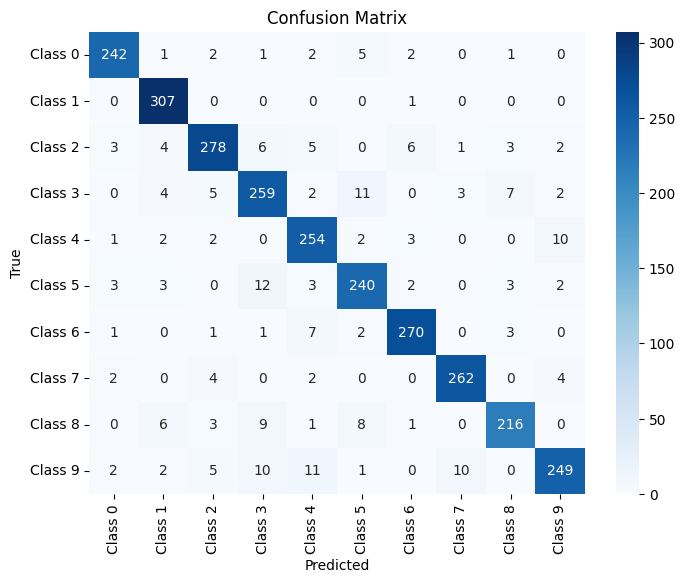

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


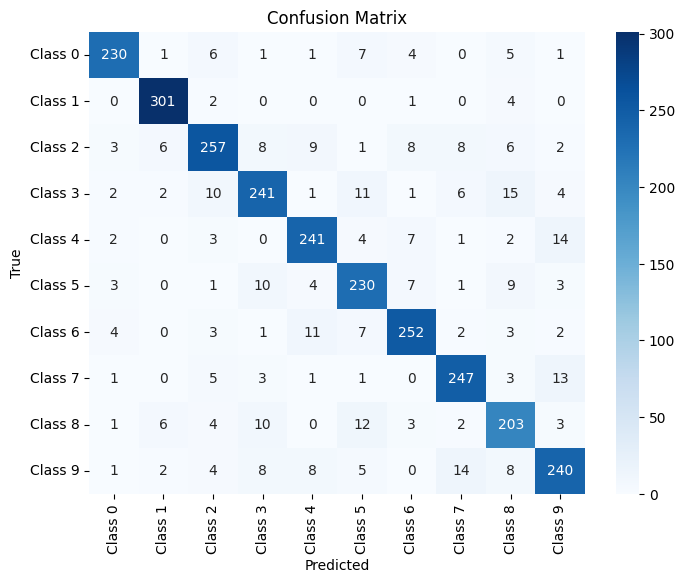

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


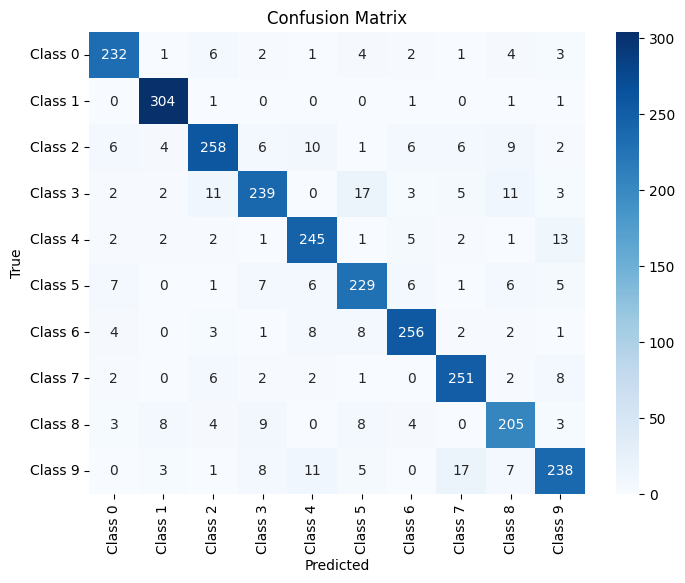

In [268]:
# Provare la funzione pipeline su tutte le configurazioni presenti qui di seguito

hyperparams_1 = {
    'use_pca': False,  
    'classifier': 'svm',  
}

hyperparams_2 = {
    'use_pca': True,  
    'classifier': 'svm',  
}

hyperparams_3 = {
    'use_pca': False,  
    'classifier': 'lr',  
}

hyperparams_4 = {
    'use_pca': True,  
    'classifier': 'lr',  
}
pipeline(trainX, trainY, validationX, validationY, hyperparams_1)
pipeline(trainX, trainY, validationX, validationY, hyperparams_2)
pipeline(trainX, trainY, validationX, validationY, hyperparams_3)
pipeline(trainX, trainY, validationX, validationY, hyperparams_4)
# svolgimento...